実行環境の整備


データの準備
-国土数値情報のホームページから，行政区域データをダウンロードする。（東京都）
https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-2024.html

- N03-20240101_13_GML.zip

zipファイルをdataフォルダに解凍する。
- data/N03-20240101_13_GML/N03-20240101_13.geojson 他
  
- 国土数値情報のホームページから，医療機関データをダウンロードする。
https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-P04-2020.html
- P04-20_13_GML/P04-20_13.geojsonほか
 
zipファイルをdataフォルダに解凍する。
- data/N03-20240101_13_GML/N03-20240101_13.geojson 他

厚生労働省HP「令和２年度DPC導入の影響評価に係る調査「退院患者調査」の結果報告について」より，
(5)救急車による搬送の有無（Excel：662KB）のexcelファイル(000917024.xlsx)をダウンロードする。
https://www.mhlw.go.jp/stf/shingi2/0000196043_00005.html

data/data/000917024.xlsx

In [3]:
import pathlib

In [ ]:
NOTEBOOK_PATH=pathlib.Path().resolve()
DATA_DIRECTORY=NOTEBOOK_PATH/"data"

医療機関データを読み込む

In [12]:
import geopandas as gpd

In [93]:
kikan_data=gpd.read_file(DATA_DIRECTORY/"P04-20_13_GML/P04-20_13.geojson")
cname={'P04_001':'医療機関分類','P04_002':'施設名称','P04_003':'所在地','P04_004':'診療科目1','P04_005':'診療科目2','P04_006':'診療科目3','P04_007':'開設者分類',}
#列名を付け替える
kikan_data=kikan_data.rename(columns=cname)
#救急告示病院指定のある機関を抜き出す
kikan_data=kikan_data[kikan_data['P04_009']==1].reset_index(drop=True)
kikan_data

,医療機関分類,施設名称,所在地,診療科目1,診療科目2,診療科目3,開設者分類,P04_008,P04_009,P04_010,geometry
0,1,ＪＲ東京総合病院,渋谷区代々木2-1-3,内科 呼吸器内科 循環器内科 消化器内科 脳神経内科 糖尿病内分泌内科 血液腫瘍内科 リウマ...,放射線科 麻酔科 ペイン外科 臨床検査科 救急科 皮膚科 歯科口腔外科 病理診断科 血管外科,None,6,425,1,9,POINT (139.69977 35.68569)
1,1,ＮＴＴ東日本関東病院,品川区東五反田5-9-22,内科 呼吸器内科 循環器内科 小児科 精神科 外科 整形外科 脳神経外科 心臓血管外科 産婦...,腎臓内科 感染症内科 緩和ケア内科 脳神経内科 脳 血管内科 乳腺外科 呼吸器外科 頭頸部外...,None,6,594,1,2,POINT (139.72554 35.63129)
2,1,あけぼの病院,町田市中町1-23-3,内科 循環器内科 腎臓内科 人工透析内科 糖尿病内分泌内科 ペイン内科 外科 消化器外科 大...,None,None,4,98,1,9,POINT (139.44508 35.54962)
3,1,あやせ循環器リハビリ病院,足立区谷中3-12-10,心臓リハビリテーション科 心臓血管外科 循環器内科,None,None,4,57,1,9,POINT (139.83470 35.77955)
4,1,クロス病院,渋谷区幡ケ谷2-18-20,内科 胃腸科 外科 整形外科 リハビリ科,None,None,5,42,1,9,POINT (139.67490 35.67720)
...,...,...,...,...,...,...,...,...,...,...,...
312,2,木挽町医院,中央区銀座4-11-4 木挽町ビル1階〜5階,内科 消化器内科 外科 整形外科 脳神経外科 放射線科 救急科,None,None,9,19,1,9,POINT (139.76842 35.67006)
313,1,要町病院,豊島区要町1-11-13,内科 呼吸器内科 循環器内科 神経内科 外科 消化器外科 整形外科 形成外科 泌尿器科 放射...,None,None,4,150,1,9,POINT (139.69909 35.73352)
314,1,立正佼成会附属佼成病院,杉並区和田2-25-1,内科 消化器内科 循環器内科 外科 消化器外科 呼吸器外科 乳腺外科 精神科 小児科 産婦人...,呼吸器内科 気管食道 耳鼻咽喉科 臨床検査科,None,6,340,1,2,POINT (139.65541 35.68972)
315,1,立川相互病院,立川市緑町4-1,内科 消化器内科 循環器内科 呼吸器内科 神経内科 血液内科 内分泌内科 糖尿病代謝内科 腎...,病理診断科 麻酔科 放射線科 心療内科 精神科 脳神経外科,None,4,287,1,9,POINT (139.41342 35.70362)


救急搬送データを読み込む。

In [26]:
import pandas as pd
hanso_data=pd.read_excel(DATA_DIRECTORY/"000917024.xlsx",header=1)

In [31]:
cname={'Unnamed: 0':'告示番号',
 'Unnamed: 1':'通番',
 'Unnamed: 2':'施設名',
 '平成28年度':'搬送率H28',
 '平成29年度':'搬送率H29',
 '平成30年度':'搬送率H30',
 '令和元年度':'搬送率R1',
 '令和2年度':'搬送率R2',
 '平成28年度.1':'搬送数H28',
 '平成29年度.1':'搬送数H29',
 '平成30年度.1':'搬送数H30',
 '令和元年度.1':'搬送数R1',
 '令和2年度.1':'搬送数R2'}
#列名を付け替える
hanso_data=hanso_data.rename(columns=cname)
hanso_data.head()


,告示番号,通番,施設名,搬送率H28,搬送率H29,搬送率H30,搬送率R1,搬送率R2,搬送数H28,搬送数H29,搬送数H30,搬送数R1,搬送数R2
0,10001.0,10001,札幌医科大学附属病院,0.034552,0.033622,0.043929,0.041953,0.037183,40.333333,41.083333,55.750000,55.416667,43.166667
1,10002.0,10002,北海道大学病院,0.038923,0.037747,0.043419,0.046906,0.049160,44.333333,43.833333,53.416667,57.916667,57.083333
2,10003.0,10003,旭川医科大学病院,0.080201,0.076145,0.076991,0.082871,0.078322,79.833333,76.500000,80.333333,87.166667,79.333333
3,10004.0,10004,弘前大学医学部附属病院,0.084341,0.092073,0.090840,0.083048,0.087606,70.333333,79.083333,79.416667,76.750000,77.166667
4,10005.0,10005,岩手医科大学附属病院,0.105288,0.099338,0.095989,0.121981,0.116079,165.750000,160.083333,155.166667,174.666667,160.750000


In [94]:
#機関データに搬送データを追加する
kikan_data=kikan_data.merge(hanso_data,how="left",left_on="施設名称",right_on="施設名").reset_index(drop=True)
kikan_data.columns

Index(['医療機関分類', '施設名称', '所在地', '診療科目1', '診療科目2', '診療科目3', '開設者分類', 'P04_008',
       'P04_009', 'P04_010', 'geometry', '告示番号', '通番', '施設名', '搬送率H28',
       '搬送率H29', '搬送率H30', '搬送率R1', '搬送率R2', '搬送数H28', '搬送数H29', '搬送数H30',
       '搬送数R1', '搬送数R2'],
      dtype='object')

# 東京都の行政区域データを読み込む

In [128]:
tokyo_area=gpd.read_file(DATA_DIRECTORY/"N03-20240101_13_GML/N03-20240101_13.geojson")
list(tokyo_area.columns)
cname={'N03_001':'都道府県名','N03_002':'北海道の振興局名','N03_003':'郡名','N03_004':'市区町村名','N03_005':'政令指定都市の行政区域名','N03_007':'全国地方公共団体コード'}
#列名を付け替える
tokyo_area=tokyo_area.rename(columns=cname)
#東部の抜き出す
tokyo_east=tokyo_area[tokyo_area['市区町村名'].isin(['文京区','豊島区','新宿区','渋谷区','千代田区','港区','中央区','荒川区','台東区','江東区','墨田区','葛飾区','江戸川区',])].reset_index()

<Axes: >

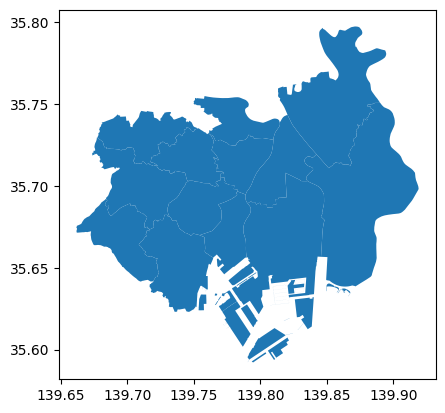

In [129]:
#東京東部の地図をプロットしてみる。
tokyo_east.plot()

In [106]:
#座標系を揃える
tokyo_east=tokyo_east.to_crs(kikan_data.crs)
#kikan_dataの中の医療機関で，tokyo_eastの地域に含まれるものにその情報（市区町村名）を追加する
kikan_east=kikan_data.sjoin(tokyo_east,how="left",predicate="within")

In [115]:
#kikan_eastの中で，"市区町面名"がeast_names内にあるものを抜き出して，kikan_eastに上書きする
east_names=['文京区','豊島区','新宿区','渋谷区','千代田区','港区','中央区','荒川区','台東区','江東区','墨田区','葛飾区','江戸川区']
kikan_east=kikan_east[kikan_east["市区町村名"].isin(east_names)].reset_index(drop=True)
kikan_east.columns

Index(['医療機関分類', '施設名称', '所在地', '診療科目1', '診療科目2', '診療科目3', '開設者分類', 'P04_008',
       'P04_009', 'P04_010', 'geometry', '告示番号', '通番', '施設名', '搬送率H28',
       '搬送率H29', '搬送率H30', '搬送率R1', '搬送率R2', '搬送数H28', '搬送数H29', '搬送数H30',
       '搬送数R1', '搬送数R2', 'index_right', 'index', '都道府県名', '北海道の振興局名', '郡名',
       '市区町村名', '政令指定都市の行政区域名', '全国地方公共団体コード'],
      dtype='object')

In [130]:
#東京東部の救急告示病院を地図上にプロットする。
gpd.GeoDataFrame(kikan_east[["施設名称","搬送率R2","搬送数R2","geometry"]]).explore(marker_kwds=dict(radius=10),column="搬送数R2")